# Преобразование Фурье

## Дискретное преобразование Фурье

Дискретное преобразование Фурье (Discrete Fourier Transform) — это одно из преобразований Фурье, широко применяемых в алгоритмах цифровой обработки сигналов (его модификации применяются в сжатии звука в MP3, сжатии изображений в JPEG и др.), а также в других областях, связанных с анализом частот в дискретном (к примеру, оцифрованном аналоговом) сигнале. Дискретное преобразование Фурье требует в качестве входа дискретную функцию. Такие функции часто создаются путём дискретизации (выборки значений из непрерывных функций). Дискретные преобразования Фурье помогают решать дифференциальные уравнения в частных производных и выполнять такие операции, как свёртки. Дискретные преобразования Фурье также активно используются в статистике, при анализе временных рядов.

### Формулы преобразований



*Прямое преобразование:*
$$
X_{k}=\sum_{n=0}^{N-1} x_n e^{-\frac{2\pi i}{N}kn}, k=0,\dots, N-1 \tag{1}
$$

Обратное преобразование:
$$
x_{k}=\frac{1}{N}\sum_{k=0}^{N-1} X_n e^{\frac{2\pi i}{N}kn}, k=0,\dots, N-1 \tag{2}
$$
где $N$ — количество значений дискретного сигнала; $x_n, n = 0, \dots, N − 1$  — измеренные значения сигнала (в дискретных временных точках с номерами $n = 0, \dots, N − 1$ , которые являются входными данными для прямого преобразования и выходными для обратного; $X_k , k = 0 ,\dots , N − 1$ — $N$ комплексных амплитуд синусоидальных сигналов, слагающих исходный сигнал; являются выходными данными для прямого преобразования и входными для обратного; поскольку амплитуды комплексные, то по ним можно вычислить одновременно и модуль и фазу.

Тогда

$|X_{n}|$  — обычная (вещественная) амплитуда $k$-го синусоидального сигнала;

$arg ⁡ ( X_n )$ — фаза $n$-го косинусоидального сигнала (аргумент комплексного числа);

$n$ — индекс частоты. Частота $n$-го сигнала равна $\frac{n}{T}$, $T$ — период времени, в течение которого брались входные данные.

Из последнего видно, что преобразование раскладывает сигнал на косинусоидальные составляющие (которые называются гармониками) с частотами от $N$ колебаний за период до одного колебания за период. Поскольку частота дискретизации сама по себе равна $N$ отсчётов за период, то высокочастотные составляющие не могут быть корректно отображены — возникает муаровый эффект. Это приводит к тому, что вторая половина из $N$ комплексных амплитуд, фактически, является зеркальным отображением первой и не несёт дополнительной информации.

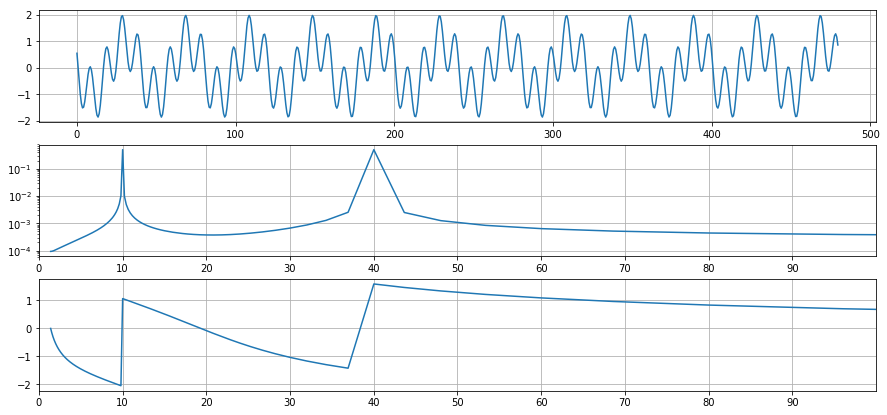

In [8]:
def dft(x, inv=False):
    X=np.empty_like(x, dtype=np.complex128)
    N=len(x)
    i=1j
    for k in range(N):
        S=0+0.*i
        for n in range(N):
            omega=2*np.pi/N*k*n
            if not inv:
                omega=-omega
            S=S+(np.cos(omega)+np.sin(omega)*i)*x[n]
        if inv: S=S/N
        X[k]=S
    return X

import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline
pl.rcParams["figure.figsize"] = (15,7)
omega=2*np.pi
dt=0.7
t=np.arange(0, 480, dt)
x=np.cos(t*omega/10+1)+np.cos(t*omega/40+np.pi/2)
N=len(x)
X= dft(x)
nu=np.arange(N)/dt/N
np.seterr(divide='ignore')
T=1/nu
fig = pl.figure()
ax = fig.add_subplot(3,1,1)
pl.plot(t,x)
pl.grid()
ax = fig.add_subplot(3,1,2)
A=np.sqrt(np.real(X)**2+np.imag(X)**2)/N
pl.semilogy(T[0:N//2], A[0:N//2])
pl.xlim([0, 100])
pl.xticks(np.arange(0,100,step=10) )
pl.grid()
P=np.arctan2(np.imag(X),np.real(X))
ax = fig.add_subplot(3,1,3)
pl.plot(T[0:N//2], P[0:N//2])
pl.xlim([0, 100])
pl.xticks(np.arange(0,100,step=10) )
pl.grid()
pl.show()
            

### Обратное преобразование Фурье

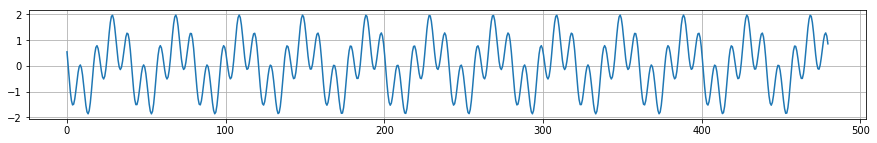

In [9]:
X= dft(x, inv=True)
pl.rcParams["figure.figsize"] = (15,2)
_=pl.plot(t,x)
pl.grid()


## Быстрое преобразование Фурье

Из соотношения (1) следует, что если последовательность ${x_k}$ является комплексной, то при прямом вычислении требуется $N^2$ комплексных умножений и  сложений. Основная идея БПФ состоит в том, чтобы исходную последовательность разбить на две более короткие последовательности, ДПФ которых могут быть скомбинированы таким образом, чтобы объединение их дало исходную $N$ точечную ДПФ. Так, например, если $N$ четное, то исходную последовательность можно разбить на две $N/2$ точечные последовательности, то для вычисления $N$ точечную ДПФ потребуется $N^2/2$ комплексных умножений, т.е. в двое меньше, чем раньше. Эту операцию можно повторить, если $N/2$ является четным. 

### Алгоритм БПФ с прореживанием по времени

Считаем, что $N$ равно степени $2$-ки. Введем две последовательности $x_{1,n}$ и $x_{2,n}$, состоящие из четных и нечетных членов $x_n$:
$$
x_{1,n}=x_{2n},
$$
$$
x_{2,n}=х_{2n+1}, n=0,\dots, N/2-1 \tag{3}
$$


Для удобства можно ввести определение поворотного множителя:
$$
W_N^{nk}=e^{\frac{\pm 2 \pi i kn}{N}}. 
$$


In [10]:
def W(k,N, n=1):
    return np.exp(-2*np.pi*1j*k*n/N)

Легко показать, что $W_N^{nk}$ является периодичной функцией с периодом $N$., т.е.
$$
W_N^{(n+mN)(k+lN)} = W_N^{kn}, l,m = 0,\pm 1, \dots \tag{4} 
$$

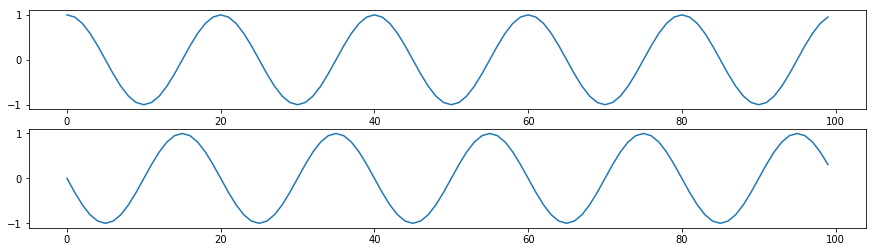

In [11]:
pl.rcParams["figure.figsize"] = (15,4)
k = range(100)
w = [W(ki, 20) for ki in k]
pl.subplot(2,1,1)
pl.plot(k,np.real(w))
pl.subplot(2,1,2)
_=pl.plot(k,np.imag(w))

$$
X_k=\sum_{n=0, чет.}^{N-1} x_n W_N^{nk}+\sum_{n=0, нечет.}^{N-1} x_n W_N^{nk}=\sum_{n=0}^{N/2-1} x_{2n} W_N^{2nk}+\sum_{n=0}^{N/2-1} x_{2n+1} W_N^{(2n+1)k} \tag{5}
$$

Выражение (5) получилось из (1), где отделены слагаемые с четными номерами от слагаемых с нечетными номерами исходной последовательности. Заметим, что $W_N^2=W_{N/2}$ , перепишем (5) с учетом (3) в виде

$$
X_k = \sum_{n=0}^{N/2-1} x_{1,n} W_{N/2}^{nk} + W_N^k \sum_{n=0}^{N/2-1} x_{2,n} W_{N/2}^{nk} \tag{6}
$$

или

$$
X_k=X_{1,k}+W_N^k X_{2,k} \tag{7}
$$

где $X_{1,k}, X_{2,k}$ равны $N/2$ точечному ДПФ последовательностей $x_{1,n}$ и $x_{2,n}$ соответственно. 

Из (7) следует, что $N$ точечное ДПФ может быть разложено на два $N/2$ точечных ДПФ, результаты которых объединяются согласно (7). Если бы $N/2$ точечное ДПФ вычислялось бы обычным образом, то потребовалось $N2/2+N$ комплексных умножений. При больших $N$ (когда $N^2/2 >> N$) это позволяет сократить вычисления на 50%. 

In [12]:
def dft2(x):
    N=len(x)
    if N % 2 > 0:
        raise ValueError("Количество отсчетов должно быть четным!")
    x1=x[::2]  #четные
    x2=x[1::2] #нечетные
    X1 = dft(x1)
    X2 = dft(x2)
    return [X1[k]+W(k,N)*X2[k]for k in range(N/2)] 

import timeit
x2 = x[:500]
t1 = timeit.timeit('dft(x2)',
                   setup="from __main__ import dft, x2",
                   number=1)
print(t1)
t2 = timeit.timeit('dft2(x2)',
                   setup="from __main__ import dft2, x2",
                   number=1)
print(t2)


1.21888303757
0.611738204956


Можно сравнить результаты двух преобразований, чтобы убедится в том, что они идентичны:

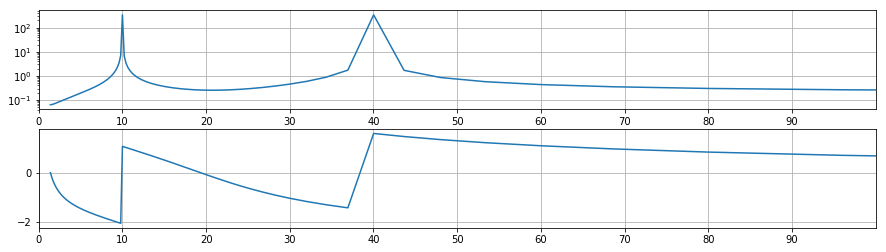

In [13]:
X=dft2(x)
A=np.abs(X)
P=np.angle(X)
N=len(x)
nu=np.arange(N)/dt/N
T=1/nu
pl.subplot(2,1,1)
pl.semilogy(T[0:N//2], A[0:N//2])
pl.xlim([0, 100])
pl.xticks(np.arange(0,100,step=10))
pl.grid()
pl.subplot(2,1,2)
pl.plot(T[0:N//2], P[0:N//2])
pl.xlim([0, 100])
pl.xticks(np.arange(0,100,step=10))
pl.grid()

Поскольку $X_k$ определено при $0\leq k \lt N, а X_{1,k}, X_{2,k}$ при $0 \leq k\lt N/2$, необходимо доопределить (7) при $k\gt N/2$. Сделаем это следующим образом, используя периодичность ДПФ и тот факт, что $W_N^{k+N/2} = e^-\frac{j2\pi (k+N/2)}{N} =e^-\frac{j2\pi k}{N}e^{-j\pi} =-W_N^k$
$$
X_k=
\begin{cases}
X_{1,k}+W_N^kX_{2,k}, 0\leq k \leq N/2-1 \\
X_{1,k-N/2}+W_N^{k-N/2}X_{2,k-N/2}, N/2\leq k \leq N
\tag{8}
\end{cases}
$$
Выражение (8) описывает получение $N$ -точечного Фурье преобразования из двух $N/2$ точечных Фурье. Видно, что для получения каждого коэффициента Фурье $X(k)$ необходимо выполнить одно умножение и одно сложение (или вычитание). 

Здесь необходимо пояснить, почему выполняется только $N/2$ умножений на каждом шаге, а не $N$ умножений? Необходимо рассмотреть выражение (8). Запишем вычисление $X_0$ и $X_{N/2}$. 
$$
X_0=X_{1,0}=W_N^0X_{2,0}\\
X_{N/2}=X_{1,N/2-N/2}-W_N^{N/2-N/2}X_{2,N/2-N/2}=X_1,0-W_N^0X_{2,0} \tag{9}
$$
Как видно из (9) $X_0$ и $X_{N/2}$ вычисляются почти одинаково, за исключением того, что в $X_{0}$ надо сложить, а в $X_{N/2}$ отнять одно и тоже произведение. Это произведение   можно посчитать один раз, а затем добавить и отнять к и от  $X_{1,0}$ для получения соответственно $X_{0}$ и $X_{N/2}$. Таким образом, чтобы вычислить два коэффициента Фурье, необходимо вычислить только одно произведение. 


Если мы продолжим разбиение последовательности на две последовательности и применим тот же механизм, то мы еще в два раза уменьшим количество умножений. Таким образом, на каждом шаге мы выполняем $N/2$ умножений, а таких шагов $\log_2N$. Число умножений равно $\frac{Nlog_2N}{2}$, что значительно меньше $N^2$  (при $N=1024$ число умножений меньше в 100 раз).
Рассмотрим на примере 8-ми точечной последовательности, т.е. $N=8$. Выражение (8) можно иллюстрировать схемой (рис. 1):


<img src="./files3/fft.png">
Рис. 1. Алгоритм Кули-Тюки для вычисления БПФ (здесь стрелка вверх означает сложение, линия, направленная вниз - вычитание).


Описанный алгоритм известен как простой алгоритм Кули-Тьюки или Быстрое преобразование Фурье (БПФ).

In [14]:
def fft(x):
    N=len(x)
    if N % 2 > 0:
        raise ValueError("Количество отсчетов должно быть степенью 2-ки")
    Y1=[]
    Y2=[]
    if N == 2: #условие окончания рекурсии
        return [x[0]+x[1], x[0]-x[1]]
    else:
        x1=x[::2]  #четные
        x2=x[1::2] #нечетные
        X1 = fft(x1)
        X2 = fft(x2)     
    for k in range(N/2):
        tmp=W(k,N)*X2[k]
        Y1.append(X1[k]+ tmp)
        Y2.append(X1[k]- tmp)
    return Y1+Y2 #объединение двух списков

xp2 = x[:512]
t1 = timeit.timeit('dft(xp2)',
                   setup="from __main__ import dft, xp2",
                   number=1)
print(t1)
t2 = timeit.timeit('fft(xp2)',
                   setup="from __main__ import fft, xp2",
                   number=1)
print(t2)


1.3117249012
0.00572085380554


При $N=2$ выполяется операция которая носит название "бабочка":
$$
X_0=x_0+x_1, \\
X_1=x_0-x_1,
$$
т.к. при $k=0$, $W_N^0 = 1$.
Можно снова сравнить результаты двух преобразований, чтобы убедится в том, что они идентичны:

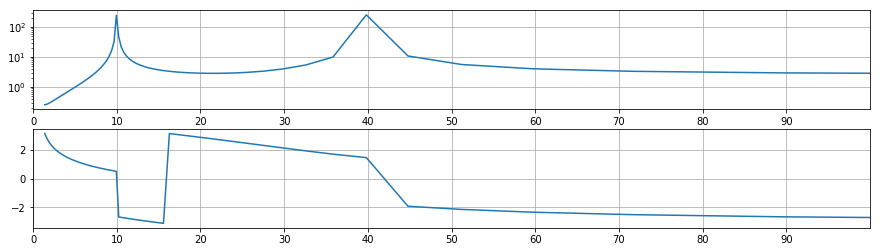

In [16]:
pl.rcParams["figure.figsize"] = (15,4)
X=dft(xp2)
A=np.abs(X)
P=np.angle(X)
N=len(xp2)
nu=np.arange(N)/dt/N
T=1/nu
pl.subplot(2,1,1)
pl.semilogy(T[0:N//2], A[0:N//2])
pl.xlim([0, 100])
pl.xticks(np.arange(0,100,step=10))
pl.grid()
pl.subplot(2,1,2)
pl.plot(T[0:N//2], P[0:N//2])
pl.xlim([0, 100])
pl.xticks(np.arange(0,100,step=10) )
pl.grid()


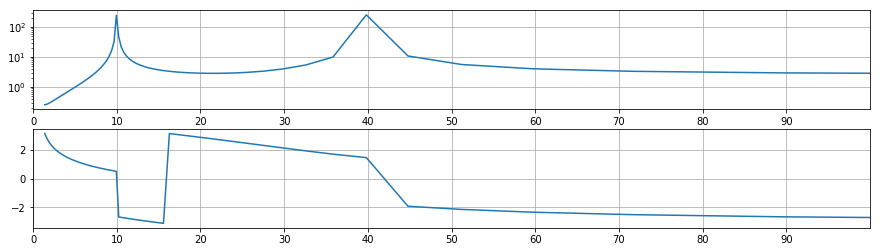

In [17]:
pl.rcParams["figure.figsize"] = (15,4)
X=fft(xp2)
A=np.abs(X)
P=np.angle(X)
N=len(xp2)
nu=np.arange(N)/dt/N
T=1/nu
pl.subplot(2,1,1)
pl.semilogy(T[0:N//2], A[0:N//2])
pl.xlim([0, 100])
pl.xticks(np.arange(0,100,step=10))
pl.grid()
pl.subplot(2,1,2)
pl.plot(T[0:N//2], P[0:N//2])
pl.xlim([0, 100])
pl.xticks(np.arange(0,100,step=10) )
pl.grid()

## Задания для самостоятельной работы

1. Реализуйте алгоритм БПФ с прореживанием по частоте (см. <ftp://ftp.iait.kg/DSP/dsp_pract_7.doc>).
2. Выполните исследование зависимости времени выполнения от количества отсчетов для алгоритмов ДПФ и БПФ и постройте графики.
3. Реализуйте алгоритм БПФ без использования рекурсии.
4. Реализуйте обратное БПФ.